In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.dates import DateFormatter

sns.set()
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.precision", 2)
mpl.rcParams['timezone'] = 'UTC'

In [11]:
# DATA_URL="../data/raw_sales.csv"
# ACCURACIES_MONTHLY_URL="../results/accuracies_monthly.csv"
# ACCURACIES_URL="../results/accuracies.csv"

APPLE_DATA_URL = "../data/apple_stock_raw.csv"
GOOGLE_DATA_URL = "../data/google-stock-dataset-Daily.csv"


In [35]:
df_apple = pd.read_csv(APPLE_DATA_URL, parse_dates=['date'])
df_google = pd.read_csv(GOOGLE_DATA_URL, parse_dates=['Date'])

df_apple = df_apple[df_apple['symbol'] == 'AAPL']
df_apple.drop(['symbol', 'splitFactor', 'Unnamed: 0'], axis=1, inplace=True)

df_google.drop(['Unnamed: 0'], axis=1, inplace=True)


In [28]:
df_apple.head()


,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash
0,2015-05-27 00:00:00+00:00,132.04,132.26,130.05,130.34,45833246,121.68,121.88,119.84,120.11,45833246,0.0
1,2015-05-28 00:00:00+00:00,131.78,131.95,131.10,131.86,30733309,121.44,121.60,120.81,121.51,30733309,0.0
2,2015-05-29 00:00:00+00:00,130.28,131.45,129.90,131.23,50884452,120.06,121.13,119.71,120.93,50884452,0.0
3,2015-06-01 00:00:00+00:00,130.53,131.39,130.05,131.20,32112797,120.29,121.08,119.84,120.90,32112797,0.0
4,2015-06-02 00:00:00+00:00,129.96,130.66,129.32,129.86,33667627,119.76,120.40,119.17,119.67,33667627,0.0


Text(0, 0.5, 'Price $')

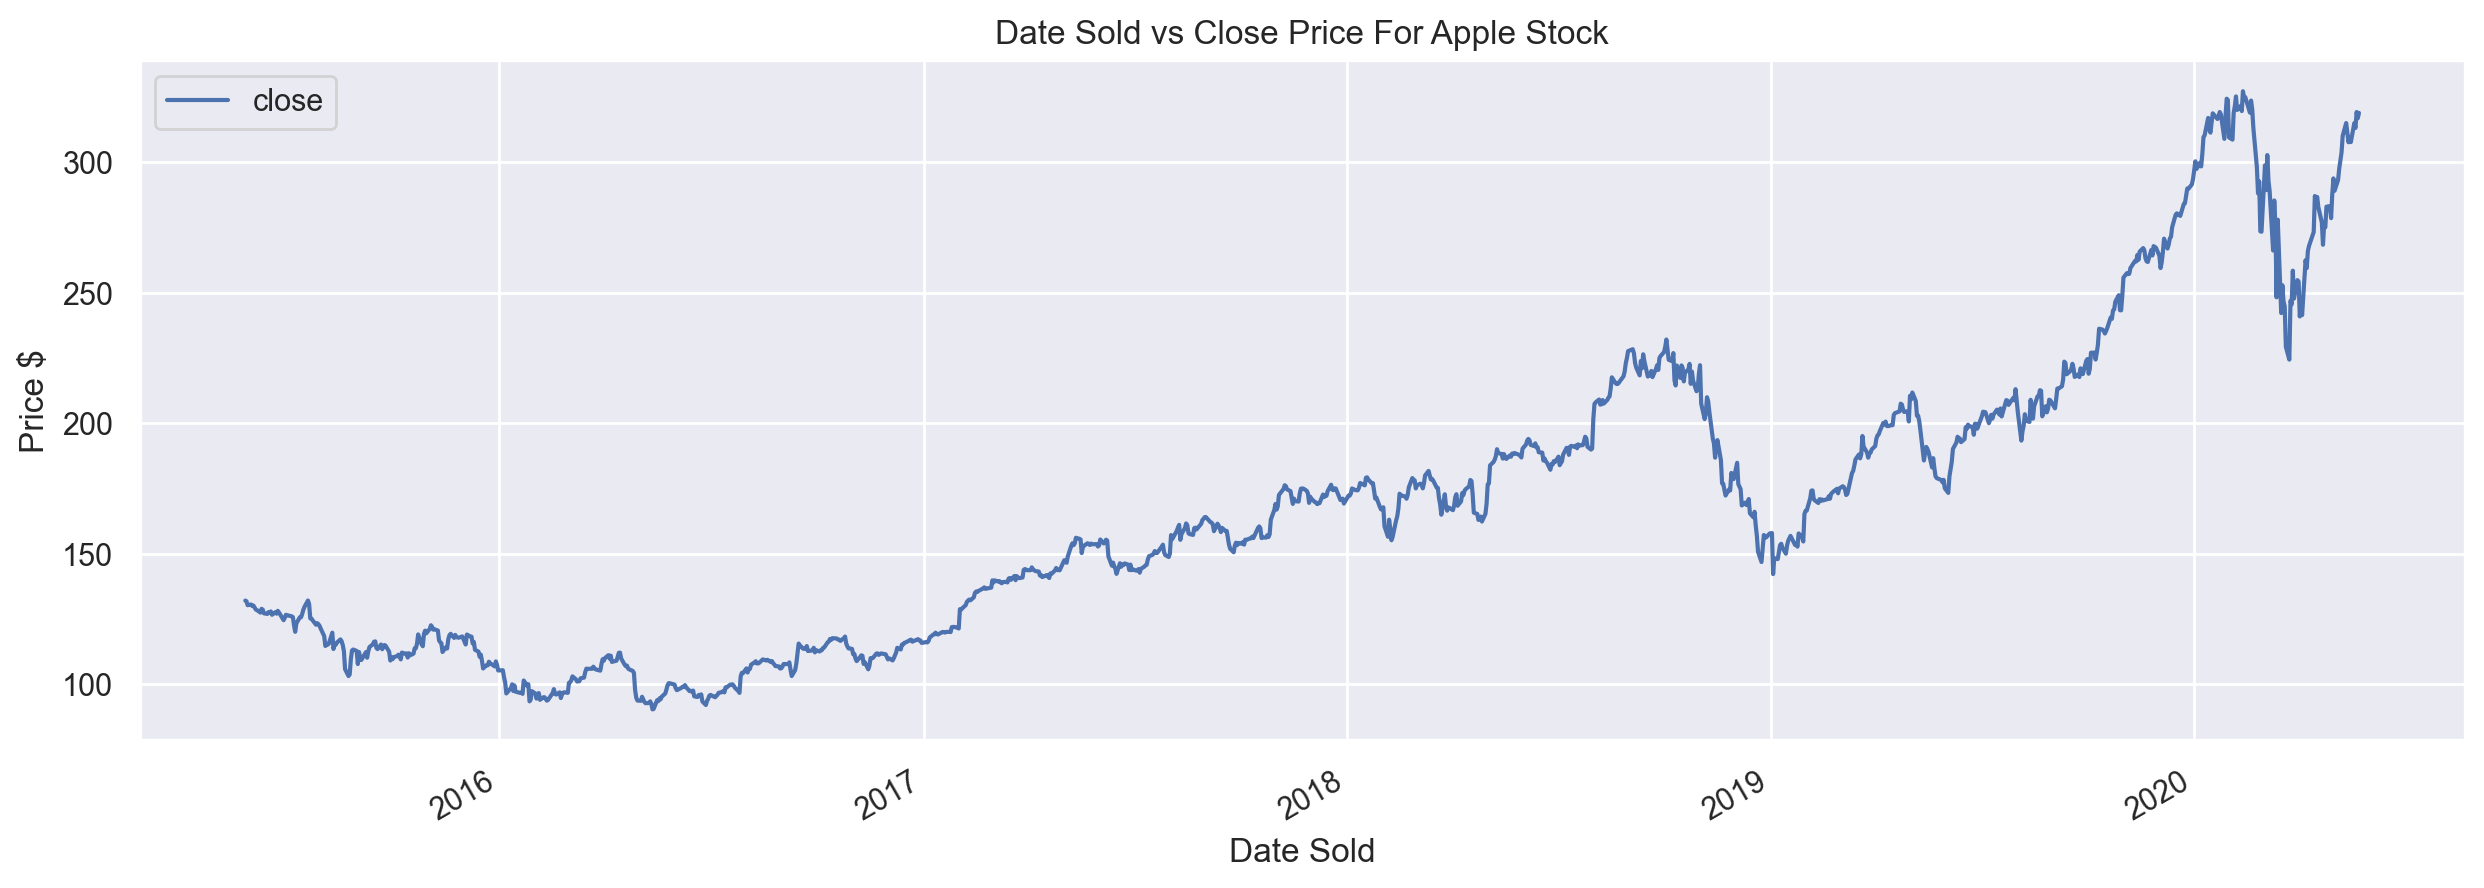

In [37]:
data = df_apple[['date', 'close']]

# data["meanmonth"] = data["price"].rolling(30).mean()


# data = data.iloc[::30]
# data.head()
data.plot(x="date", y="close", figsize=(15, 5))
plt.title("Date Sold vs Close Price For Apple Stock")
plt.xlabel('Date Sold')
plt.ylabel("Price $")

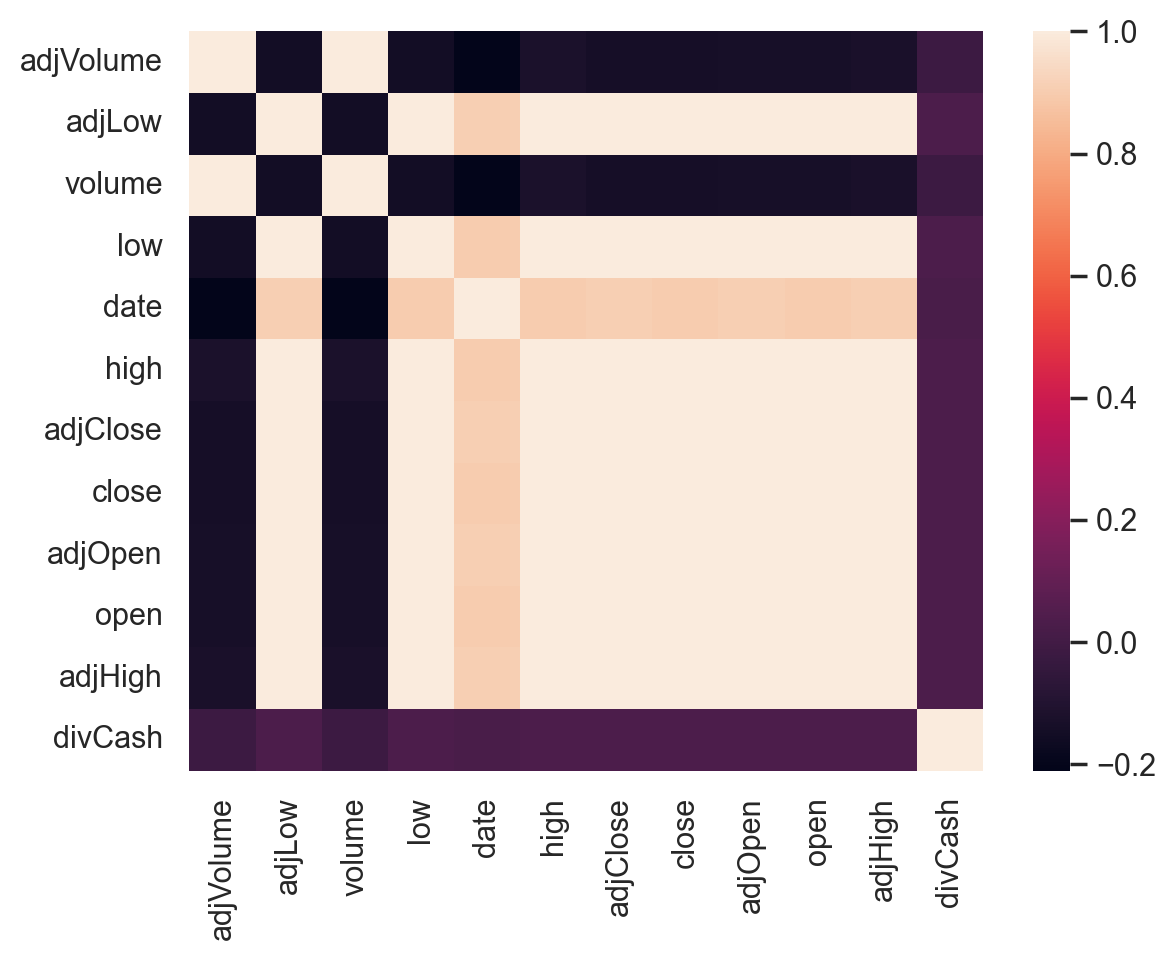

In [29]:
data = df_apple
# data["datesold"] = data["datesold"].map(lambda x: x.timestamp())

numerical = list(set(data.columns) - set([]))

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix)

In [39]:
df_google.head()

,Date,Price,High,Low,Close,Volume,Adj Close
0,2013-04-15,19.67,19.94,19.44,19.57,98025876,19.57
1,2013-04-16,19.68,19.92,19.62,19.85,69610320,19.85
2,2013-04-17,19.69,19.79,19.47,19.58,81398520,19.58
3,2013-04-18,19.65,19.66,19.05,19.17,132767100,19.17
4,2013-04-19,19.25,20.11,19.18,20.02,231895872,20.02


Text(0, 0.5, 'Price $')

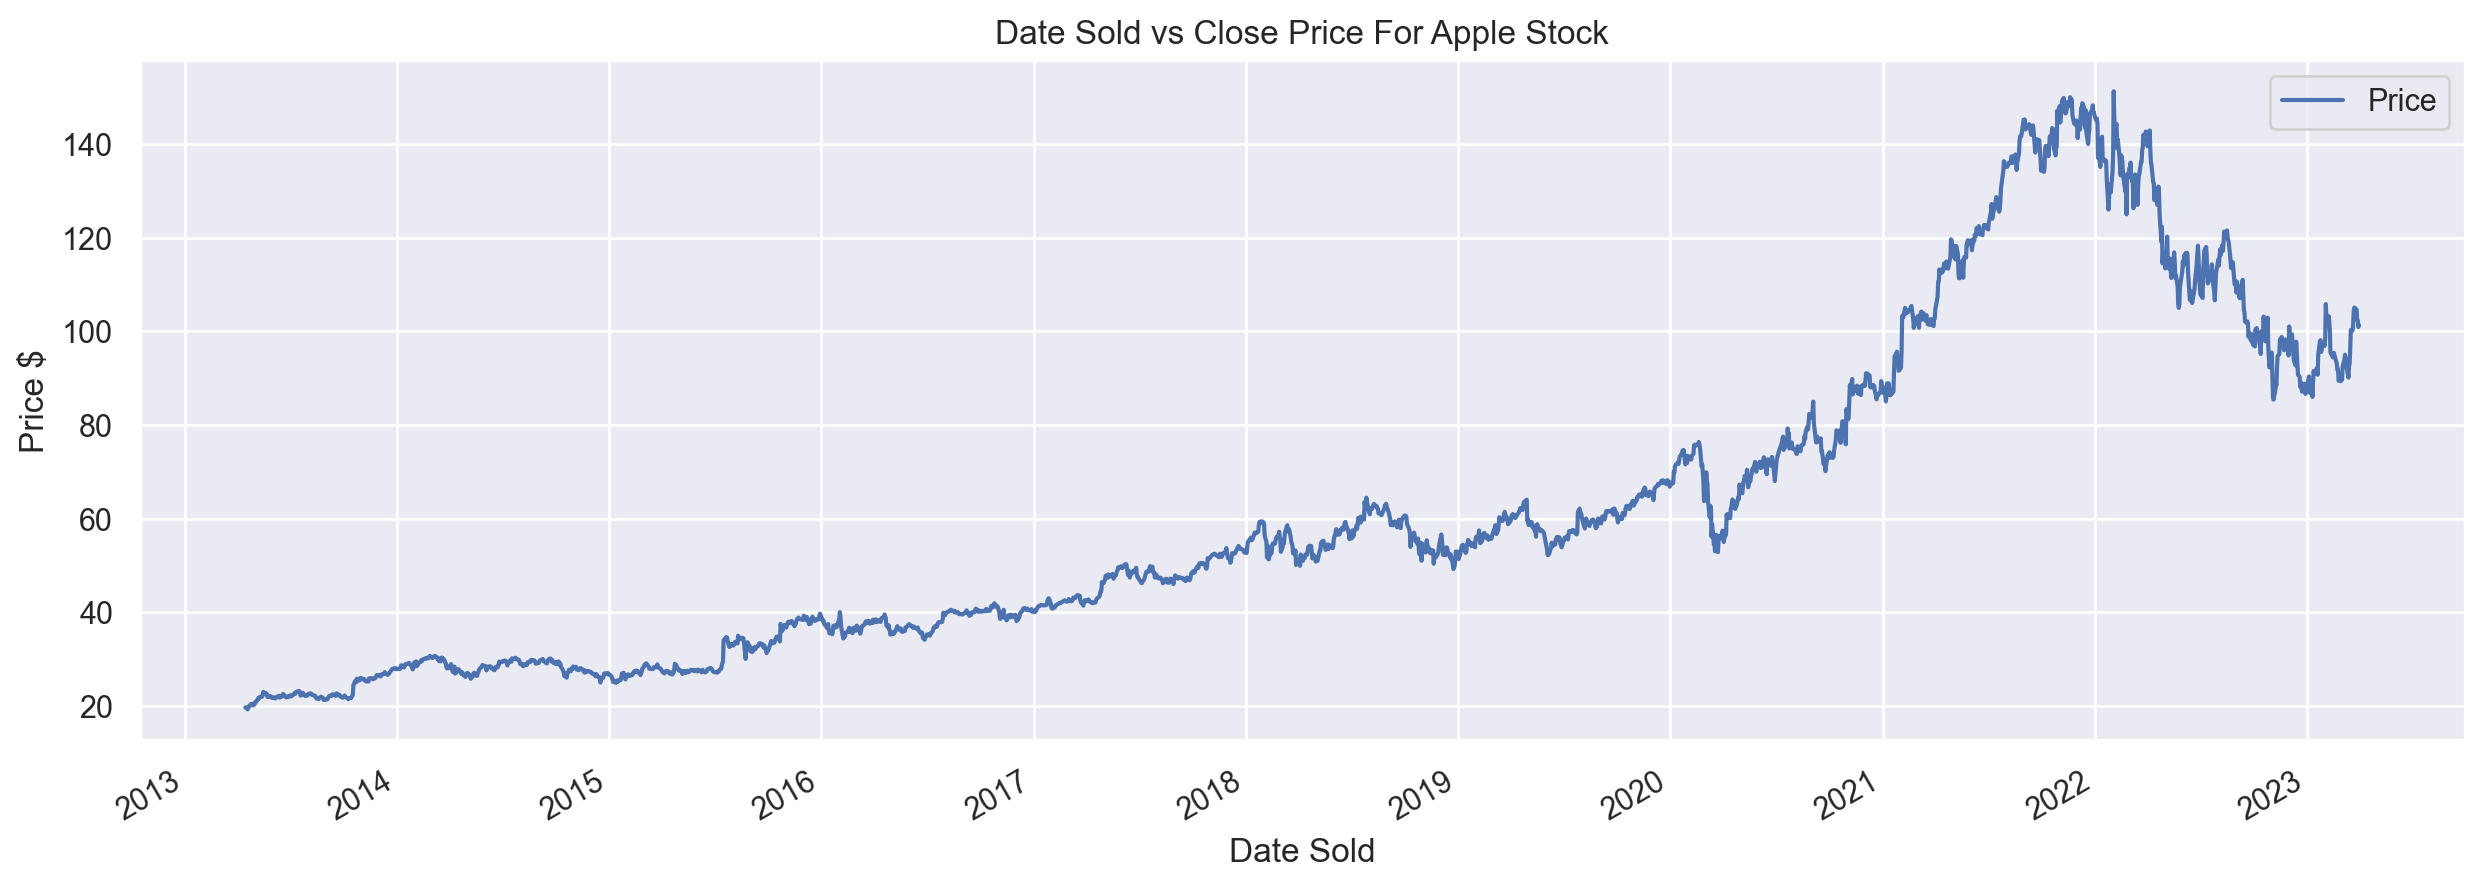

In [42]:
data = df_google[['Date', 'Price']]

# data["meanmonth"] = data["price"].rolling(30).mean()


# data = data.iloc[::30]
# data.head()

data.plot(x="Date", y="Price", figsize=(15, 5))
plt.title("Date Sold vs Close Price For Google Stock")
plt.xlabel('Date Sold')
plt.ylabel("Price $")

<Axes: >

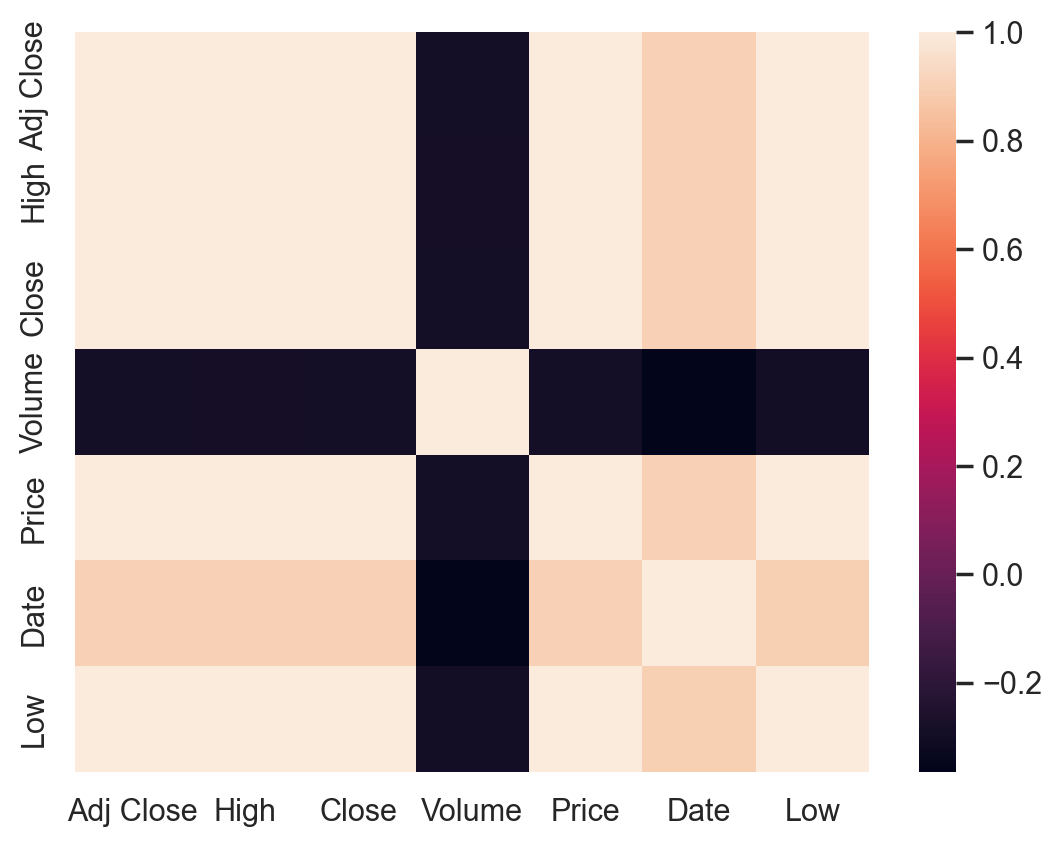

In [32]:
data = df_google
# data["datesold"] = data["datesold"].map(lambda x: x.timestamp())

numerical = list(set(data.columns) - set([]))

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix)